# Exploratory data analysis

Packages installation:



In [ ]:
install.packages("ISLR", quiet=TRUE)
install.packages("corrplot", quiet=TRUE)
install.packages("psych", quiet=TRUE)
install.packages("FNN", quiet=TRUE)
install.packages("caret", quiet=TRUE)
install.packages("ellipse", quiet=TRUE)
install.packages("mclust", quiet=TRUE)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




Global options for aestetics:

In [ ]:
options(width=140)

font_size_title = 1.5
font_size_labels = 1.5
font_size_axis = 1.5

## **Load and Explore your data**
 
### **Load Auto Data Set with R Data Frame**
 
We can load data frame directly from a library `ISLR` (eponymous to the textbook ISLR: [An Introduction to Statistical Learning : with Applications in R](https://www.statlearning.com/)).
 
**GOAL:** Check is it possible to predict Wage from other wage attributes and evaluate model's performance (perhaps in comparison to alternative models or choices of hyperparameters). 
 
**Why**: We want to evaluate the *Wage* data matrix in Colab and observe its structure and values. Exploratory Data Analysis (EDA) can guide us through possible pitfalls and help us more meaningfully choose the correct models and hyperparameters. If we don't investigate the dataset via EDA, we might as well bruteforce all possible models and hyperparameters, which is considered "fishing" for a solution. Such "data mining" is an expensive overfitting because without EDA we might need to try an enormous number of models, hyperparameters and variable transforms, which is likely to overfit anyways. EDA will help us focus our attention on sensible relationships between inputs and outputs of the model.
 
**Takeaway**: 
* From the results below we learn that our dataframe `df` has 3000 observations and 11 variables.
  - 11 variables include some numeric and some categorical:
    * It is obvious that we have numeric parameters as `year`, and `age`, and `wage`. `race` , for example, is categorical variable when we translate it into a number, those numbers don’t have mathematical meaning and we cannot add them. Ordinal variable here is `health` parameter, because we can compare them("Very good" is better than "Good").

- The rows printed by the `head()` function are random, because there are no special order.
- We also took a look to levels into `region` and discovered that there is only one region observed in the data, so it is useless information for data analysis here.

In [ ]:
library(ISLR)

data(package="ISLR")
df <- data.frame(Wage)
str(df)

'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...


In [ ]:
head(df)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


In [ ]:
nrow(df)
ncol(df)

[1] 3000

[1] 11

In [ ]:
colnames(df)

[1] "year"       "age"        "maritl"     "race"       "education"  "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

In [ ]:
?levels

In [ ]:
reg <- factor(df$region)
levels(reg)

[1] "2. Middle Atlantic"

We can drop "region" column since we have the only region considered:

In [ ]:
df$region <- NULL

In [ ]:
head(df)

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


### **Summary statistics**
 
**Why:** We can use a *summary* function to obtain a table with needed statistics
 
**Takeaway:** observe key points about summarized distributions.

 
- `wage` It depends on various factors such as type of health, family status, race, training, etc. The individual correlations do not depend on each other much, but still affect the role, for example, married people get more wages than unmarried, plus the greater the age the higher the statistically more wages, resulting in a white married man in good health has the highest wage. At this point we can also conclude about race, but let's leave it as that.


In [ ]:
print(summary(df))

      year           age                     maritl           race                   education             jobclass   
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480   1. < HS Grad      :268   1. Industrial :1544  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293   2. HS Grad        :971   2. Information:1456  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190   3. Some College   :650                        
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37   4. College Grad   :685                        
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                   5. Advanced Degree:426                        
 Max.   :2009   Max.   :80.00                                                                                         
            health      health_ins      logwage           wage       
 1. <=Good     : 858   1. Yes:2083   Min.   :3.000   Min.   : 20.09  
 2. >=Very Good:2142   2. N

### **Histogram of dependent variable**
 
**Why:** Note that the basic stats table above is sufficient to make a judgement about the distributions and even some associations (linear or nonlinear). A histogram is somewhat redundant since it also shows us the same information, but visually. However, we can draw more qualitative insights from the histogram that would go unnoticed with the numeric stats above.
  - For example, **multiple modality** would go unnoticed in basic stats summary. It's difficult to measure, but "easier* observe.
  -  That is, is there some feature $x$ that has a similar distribution as our response, `wage`, and is highly correlated. If the correlation is low, can the correlation be fixed by treating the problems (such as skew, outliers, discreteness, etc.). Always keep this in mind!

 
**Takeaway:** 
- The distribution of `mpg` response appears single-modal, asymmetric, right skewed. It seems to have finite support, which makes sense since `wage` cannot be negative (or even 0). Notice that while 318.34 wage -  is unlikely, there is upper limit.
- There are no obvious outliers to note, but we'll keep an eye for a feature $x$ with a similar shape of the sample distribution of `wage`. Note that the shape match alone is insufficient, but may be helpful. 
    - 1)As you can see from the histogram, it does not show much new data from summary correlation, but here you can more clearly analyze the average salary and how often this or that salary occurs in general. For example, the range from 60 to 120 thousand is the most normal, from 150 to 250 a few people get, and here 300 thousand has an approximate similarity with those who receive less or 50 thousand.
 


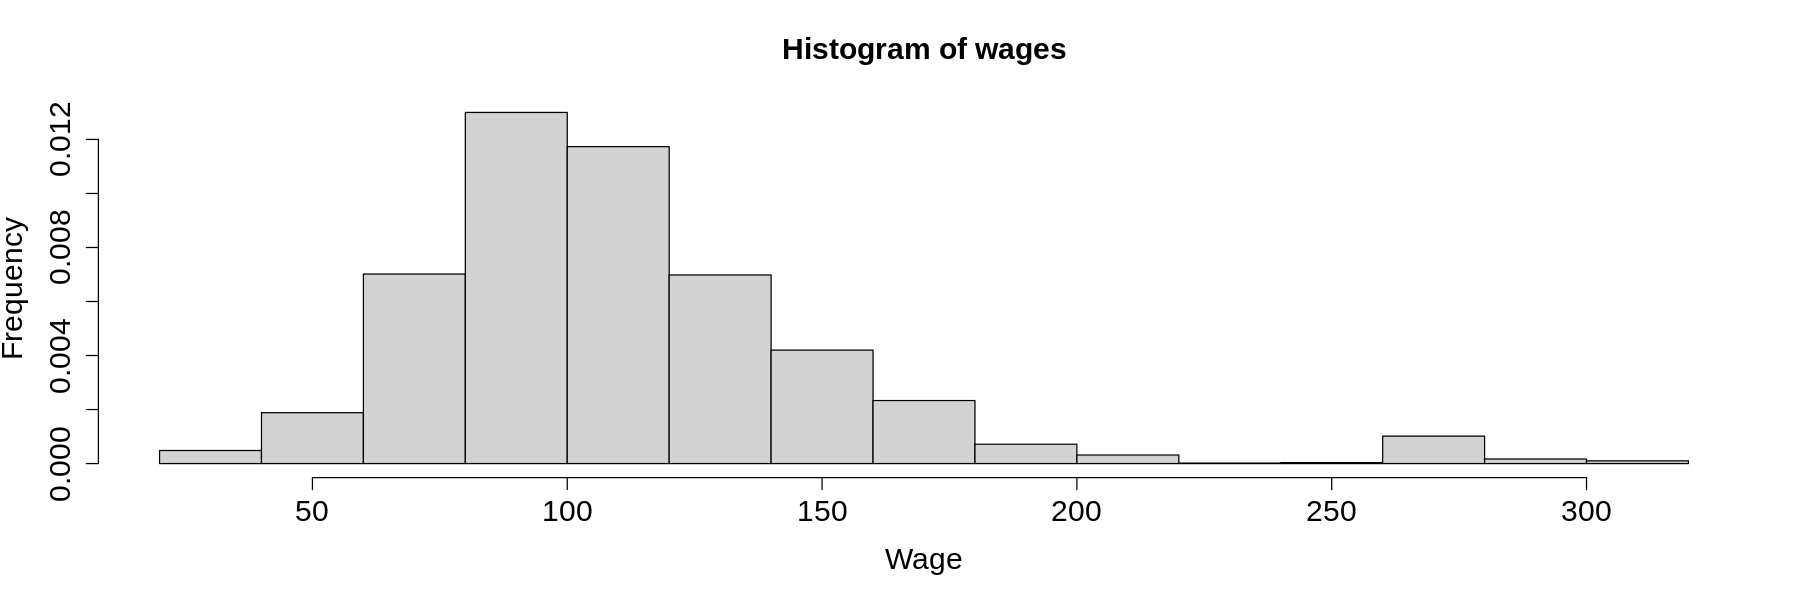

In [ ]:
options(repr.plot.width=15, repr.plot.height=5)

hist(df$wage, xlab='Wage',  ylab="Frequency", main="Histogram of wages", prob=TRUE, 
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)

The histogram of wages shows us the most popular size of wages within given data: it is just around 85

### **Correlation plot**
 
  

 
**Why:** There are several reasons for investigating correlations:
1. **I/O correlations** (i.e. between features and `wages`) help us decide on whether a linear model is appropriate. Strong correlations favor linear regression
1. **Perfectly collinear features** must be treated to be able to use least squares linear model, which assumes lack of perfect collinearity among features.
1. **I/I correlations** (i.e. between various input features; no response!) help us decide whether dimension reduction techniques might be appropriate (if needed). Strong I/I correlations can result in unstable coefficients.
 
**Takeaway:** 
1. **Correlations:** There are lots of valuable features with very low correlation with `wage`. These are `year`, `age`, `martil`, `race`, `jobclass`. 
  1. These relationships partly make sense.
  2. Our prior knowledge suggests that people with higher education have higher wages, so 0.48 correlation makes sense. 
  3. Suddenly, we have -0.31 correlation between *health insurance* and *wages*, indicating that workers with medical insurance has lower wages
2. **Perfect collinearity:** not observed. 
3. **I/I Correlations:** Notice that `wages` and `logwage` have a correlation of 0.95. This means that while `logwage` highly predictive of `wage` (as noted above). 


Now I have to make columns numerical in order to find correlations.

In [ ]:
df$maritl <- as.numeric(df$maritl)
df$race <- as.numeric(df$race)
df$education <- as.numeric(df$education)
df$jobclass <- as.numeric(df$jobclass)
df$health <- as.numeric(df$health)
df$health_ins <- as.numeric(df$health_ins)

#Let's look how df looks now
head(df)

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
231655,2006,18,1,1,1,1,1,2,4.318063,75.04315
86582,2004,24,1,1,4,2,2,2,4.255273,70.47602
161300,2003,45,2,1,3,1,1,1,4.875061,130.98218
155159,2003,43,2,3,4,2,2,1,5.041393,154.68529
11443,2005,50,4,1,2,2,1,1,4.318063,75.04315
376662,2008,54,2,1,4,2,2,1,4.845098,127.11574


In [ ]:
new_df <- df
new_df$wage <- NULL

In [ ]:
res <- round(cor(new_df, df$wage), 2)
colnames(res) <- "wage"
print(res)

            wage
year        0.07
age         0.20
maritl      0.07
race       -0.03
education   0.48
jobclass    0.21
health      0.15
health_ins -0.31
logwage     0.95


In the cell above we have observed the correlation between wage value and other parameters 

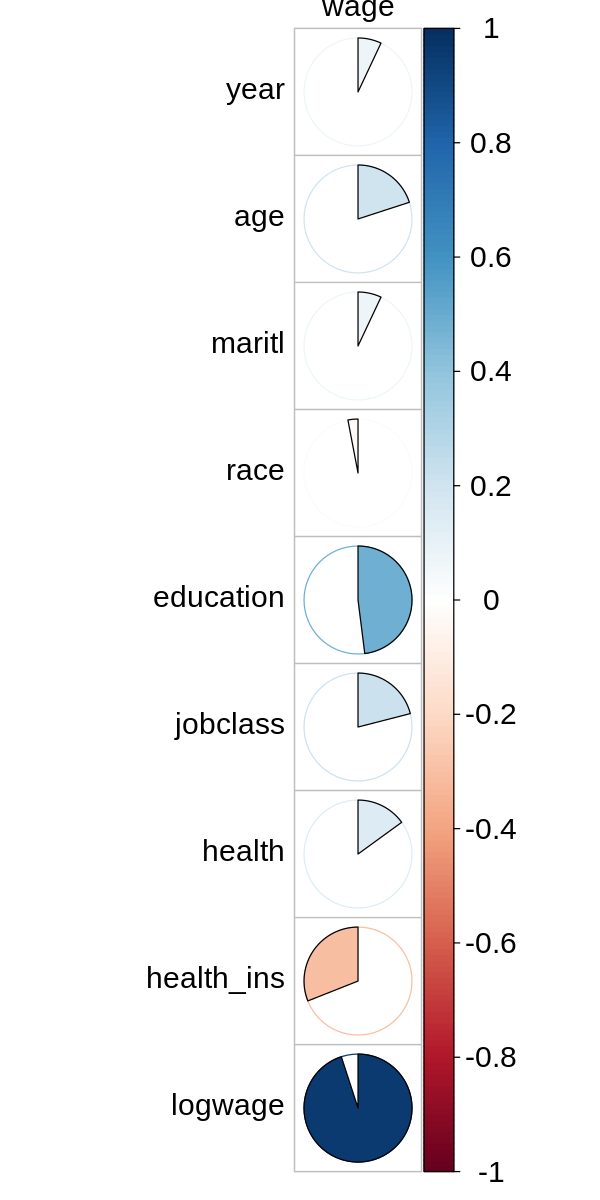

In [ ]:
library(corrplot)

options(repr.plot.width=5, repr.plot.height=10)
corrplot(res, method = "pie", tl.col = "black", 
        tl.srt = 0, tl.cex=font_size_labels, 
        cl.cex=font_size_labels, cl.pos = 'r', cl.ratio = 0.8)